# Linear Regression on `load_boston` Data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.preprocessing import scale

## 1 - Setting up the computation graph

In [2]:
features, labels = load_boston(True)

# obtain 300 samples for training
trainX = scale(features[:300])
trainY = labels[:300]

# keep 100 samples for validation
validX = scale(features[300:400])
validY = scale(labels[300:400])

# keep the remaining for testing
testX = scale(features[400:])
testY = scale(features[400:])

In [3]:
# generate a set of normalized set of numbers from the normal distribution
# choosing a random set of initial weights is considered a good practice in ML
w = tf.Variable(tf.truncated_normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float64))

# introduce the linear bias
b = tf.Variable(tf.zeros(1, dtype=tf.float64))

In [4]:
def calc(x, y):
    '''Returns predictions and error'''
    
    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))
    
    return (predictions, error)

In [5]:
y, cost = calc(trainX, trainY)

learning_rate = 0.025
epochs = 3000

# keep iteration & cost data for plotting after running the model
points = [[], []] # [iteration (i.e. epoch), model error (i.e. cost)]

init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Running the graph in a TF Session

Error in epoch 0: 673.1611918205509
Error in epoch 100: 78.9426532607856
Error in epoch 200: 78.7635905396452
Error in epoch 300: 78.73527529913295
Error in epoch 400: 78.72817079396212
Error in epoch 500: 78.72615348656184
Error in epoch 600: 78.72555618790997
Error in epoch 700: 78.72537648101114
Error in epoch 800: 78.72532203076162
Error in epoch 900: 78.7253054760554
Error in epoch 1000: 78.7253004339986
Error in epoch 1100: 78.72529889690385
Error in epoch 1200: 78.72529842807529
Error in epoch 1300: 78.72529828503885
Error in epoch 1400: 78.72529824139205
Error in epoch 1500: 78.72529822807289
Error in epoch 1600: 78.72529822400828
Error in epoch 1700: 78.72529822276707
Error in epoch 1800: 78.7252982223884
Error in epoch 1900: 78.72529822227312
Error in epoch 2000: 78.72529822223804
Error in epoch 2100: 78.7252982222269
Error in epoch 2200: 78.72529822222359
Error in epoch 2300: 78.72529822222275
Error in epoch 2400: 78.72529822222296
Error in epoch 2500: 78.72529822222232
Erro

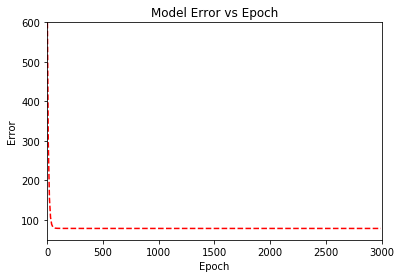

Validation error: 650.4682351111085 

Test error: 650.3143889537322 



In [7]:
# TRAIN THE MODEL

with tf.Session() as sess:
    # 1 - initialize variable operators
    sess.run(init)
    
    for epoch in range(epochs):
        sess.run(optimizer)
        
        if epoch % 10 == 0:
            points[0].append(epoch + 1)
            points[1].append(sess.run(cost))
            
        if epoch % 100 == 0:
            print('Error in epoch {}:'.format(epoch), sess.run(cost))
    
    plt.title('Model Error vs Epoch')
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.plot(points[0], points[1], 'r--')
    plt.axis([0, epochs, 50, 600])
    plt.show()
    
    valid_cost = calc(validX, validY)[1]
    
    print('Validation error:', sess.run(valid_cost), '\n')
    
    test_cost = calc(testX, testY)[1]
    
    print('Test error:', sess.run(test_cost), '\n')